# 1. Importing dependencies and data

In [1]:
!pip install tensorflow tensorflow-datasets matplotlib ipywidgets

In [2]:
!pip install tensorflow-macos tensorflow-metal

In [3]:
# Loading tensorflow
import tensorflow as tf
# Limiting RAM usage
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# Loading tensorflow datasets for fashion_mnist 
import tensorflow_datasets as tfds
#Loading matplotlib for visualization
from matplotlib import pyplot as  plt


In [6]:
# Using the tensorflow  datasets API to load the data source
ds = tfds.load('fashion_mnist', split='train')

# 2. Data visualization and building dataset

In [7]:
import numpy as np

# Iterator
dataiterator = ds.as_numpy_iterator()
# xtracting data out of the pipeline
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

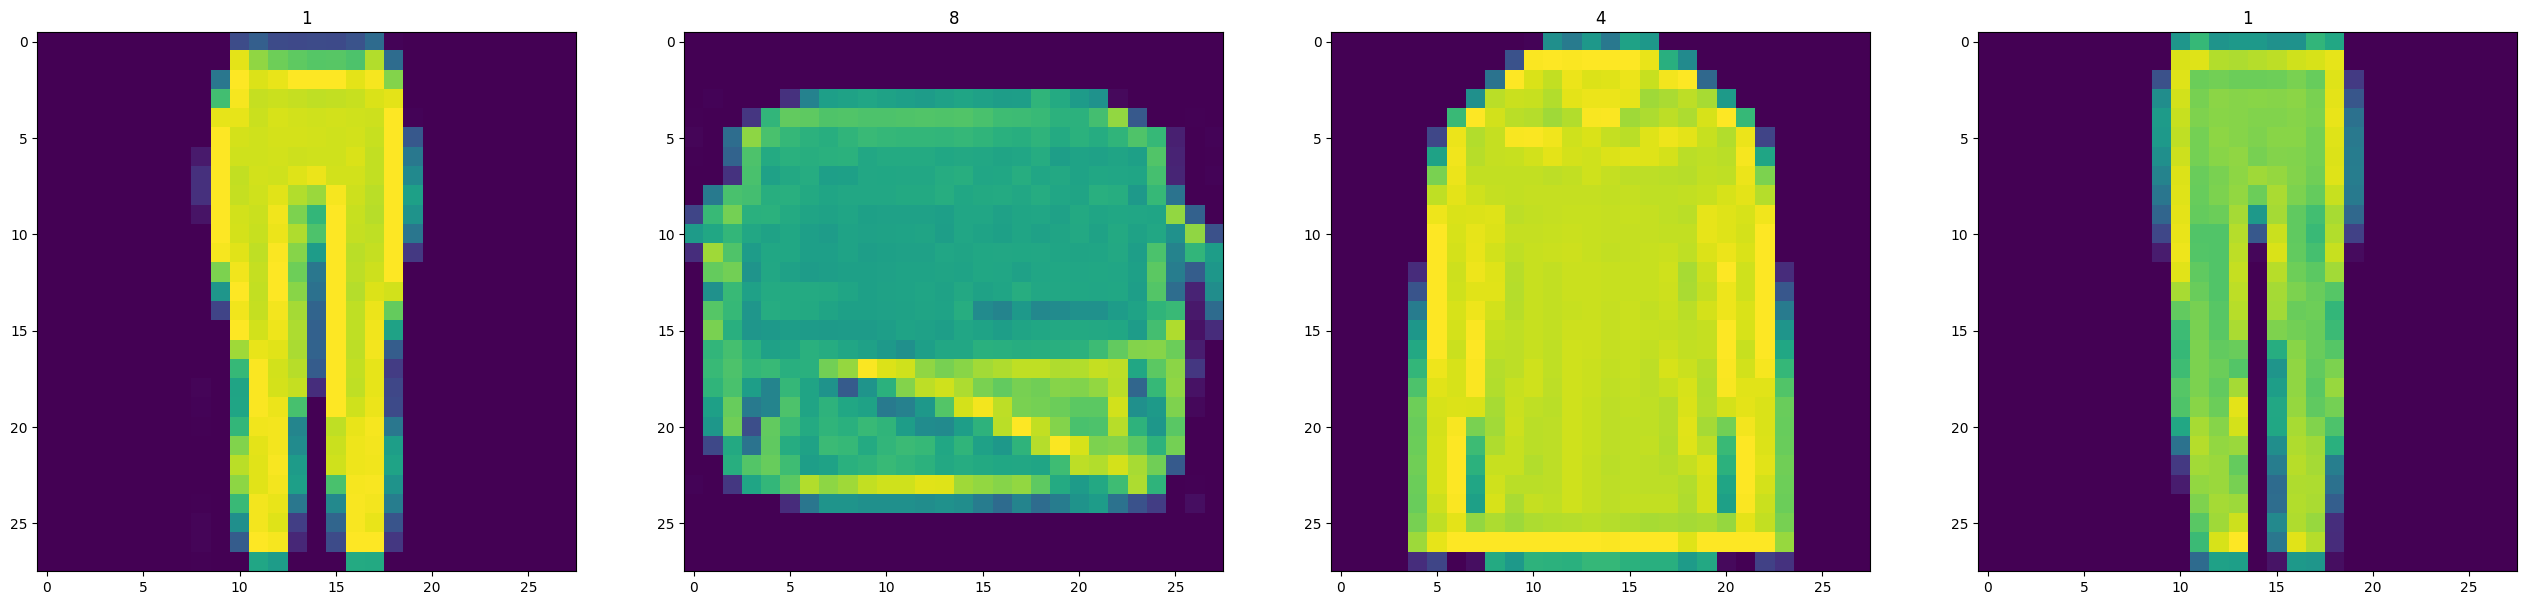

In [8]:
# Subplot formatting
fig, ax = plt.subplots(ncols=4,figsize=(32,32))
# Looping 4 times and getting images
for i in range(4):
    batch = dataiterator.next()
    ax[i].imshow(np.squeeze(batch['image']))
    ax[i].title.set_text(batch['label'])

In [9]:
# Images scaler
def scale_images(data):
    image = data['image']
    return image/255

In [10]:
# Realoading the dataset and running it through preprocessor (scale_images)
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(tf.data.AUTOTUNE)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Building Neural Network

## 3.1 Importing libraries and components

In [12]:
# Sequential API
from tensorflow.keras.models import Sequential
# Layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## 3.2 Building generator

In [13]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128, input_dim=128)) # Dense, fully-connected layer
    model.add(LeakyReLU(0.2))                # Activation function
    model.add(Reshape((7,7,128)))            # Reshaping it to the data size

    model.add(UpSampling2D())                #Upsampling block 1
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())                #Upsampling block 2
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding='same')) #Convolutional block 1
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, 4, padding='same')) #Convolutional block 2
    model.add(LeakyReLU(0.2))
                                              #Output layer
    model.add(Conv2D(1, 4, padding='same', activation = 'sigmoid'))

    return model

In [15]:
generator = build_generator()

In [16]:
generator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


(4, 28, 28, 1)

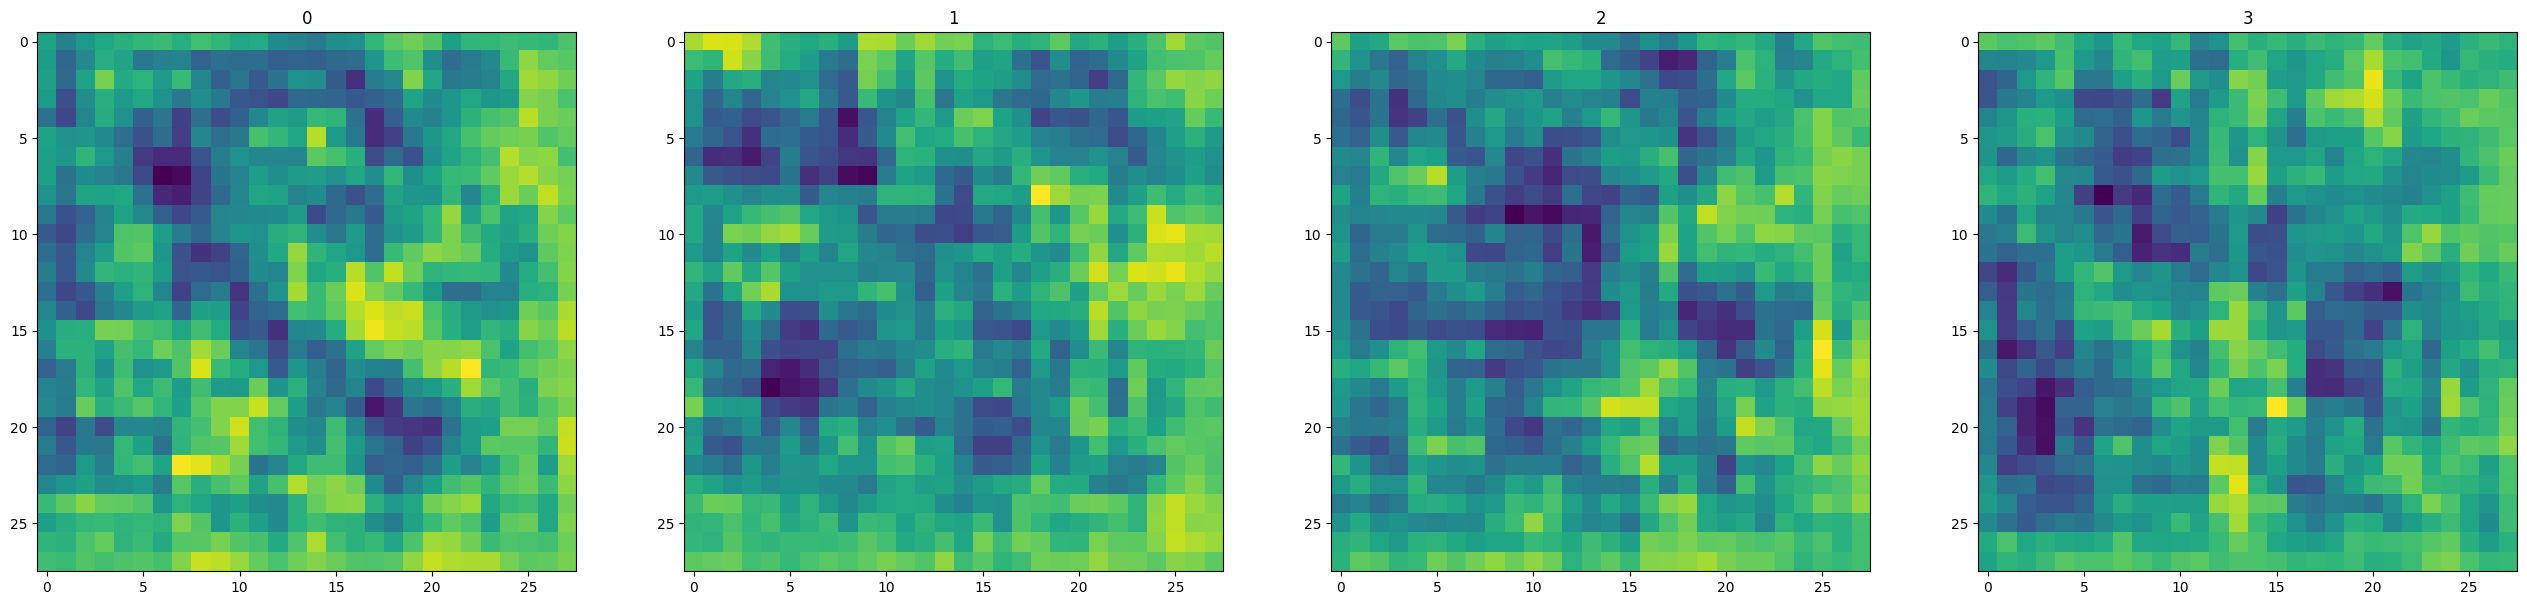

In [19]:
# Subplot formatting
fig, ax = plt.subplots(ncols=4,figsize=(32,32))
# Looping 4 times and getting images
for i, img in enumerate(img):
    ax[i].imshow(np.squeeze(img))
    ax[i].title.set_text(i)

## 3.3 Building discriminator

In [20]:
def build_discriminator():
    model = Sequential()

    # Convolutional block 1
    
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Convolutional block 2
    
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Convolutional block 3
    
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Convolutional block 4
    
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flattening and passing to dense layer
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [22]:
discriminator = build_discriminator()

In [23]:
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(4, 28, 28, 1)

In [25]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


array([[0.5018133 ],
       [0.5017021 ],
       [0.5015763 ],
       [0.50161403]], dtype=float32)

# 4. Constructing training loop

## 4.1 Setting up losses and optimizers

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

## 4.2 Building subclassed model

In [28]:
# Importing a base model class to subclass the training step
from tensorflow.keras.models import Model

In [29]:
class MyGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

#Training discriminator
        with tf.GradientTape() as d_tape:
#Passing both real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
#Creating labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
        
#Adding noise to the true output
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
        
#Calculating Loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
#Applying backpropagation for training Neural Network
            d_gradient = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
            self.d_opt.apply_gradients(zip(d_gradient, self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
#Generating new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            
#Creating predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            
#Calculating loss - tricking the generator to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
            
#Applying backpropagation
            g_gradient = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
            self.g_opt.apply_gradients(zip(g_gradient, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}
            

In [30]:
#Creating instance of subclass model
fashgan = MyGAN(generator, discriminator)

In [31]:
#Compiling the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## 4.3 Building callback

In [32]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [33]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

## 4.4 Training

In [34]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [35]:
hist = fashgan.fit(ds, epochs=100, callbacks=[ModelMonitor()]) 

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 229s 473ms/step - d_loss: 0.3903 - g_loss: 2.7959
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 227s 485ms/step - d_loss: 0.2744 - g_loss: 6.2040
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 221s 471ms/step - d_loss: 0.6025 - g_loss: 0.6049
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 470ms/step - d_loss: 0.2751 - g_loss: 2.7544
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 470ms/step - d_loss: 0.2746 - g_loss: 2.8190
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 219s 468ms/step - d_loss: 0.6623 - g_loss: 0.6010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 469ms/step - d_loss: 0.5326 - g_loss: 0.1419
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 469ms/step - d_loss: 0.6938 - g_loss: 0.6530
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 219s 466ms/step - d_loss: 0.7175 - g_loss: 0.5541
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 468ms/step - d_loss: 0.7088 - g_loss: 0.5768
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 220s 469ms/step - d_loss: 0.6967 - g_loss: 0.60

## 4.5 Reviewing performance

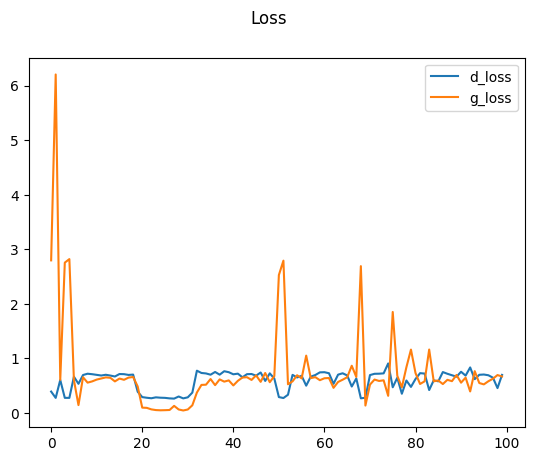

In [36]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Testing the generator

## 5.1 Generating Images

In [37]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


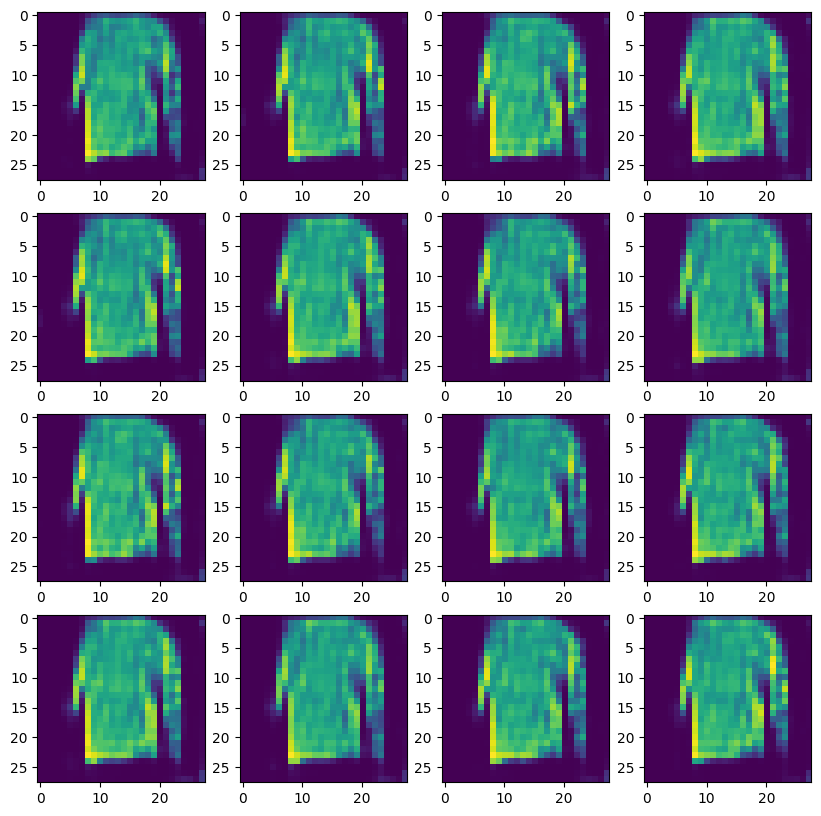

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

## 5.2 Saving the model

In [43]:
generator.save('generator_100ep.h5')
discriminator.save('discriminator_100ep.h5')